In [1]:
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [2]:
random.seed(1852026)

In [3]:
df = pd.read_excel("dataPoints.xlsx")
data = df.to_numpy()#change to matrix

You have to randomly split the data set into a training set, a validation set and a test set. Suggested
percentages for this split are 70 %, 15% and 15%, respectively, **but feel free to experiment
and change these numbers.**

Define train, test and validation set

In [4]:
def initializeParams(N):
    n=2
    n_y=1
    W = np.random.randn(N,n) 
    bias = np.random.randn(N,1) 
    V = np.random.randn(n_y,N) 
    a=pd.DataFrame(V.T)
    a[2]=W[:,0]
    a[3]=W[:,1]
    a[4]=bias
    omega=np.matrix(a)
    
 
   
    return W,bias,V,omega

In [5]:
data_train, data_rest = train_test_split(data, test_size=0.30)

In [6]:
data_test, data_validate = train_test_split(data_rest, test_size=0.50)

Create input vectors

In [7]:
X_train = np.transpose(data_train[:,0:2])
Y_train = np.transpose(data_train[:,2:])
X_validate = np.transpose(data_validate[:,0:2])
Y_validate = np.transpose(data_validate[:,2:])
X_test = np.transpose(data_test[:,0:2])
Y_test = np.transpose(data_test[:,2:])


n = X_train.shape[0] # Size of the input vector X
n_y = Y_train.shape[0] # Size of the input vector Y
P = X_train.shape[1] # Size of the sample
N = 10 # size of the hidden layer, # neurons, this is just for the moment to have some example

In [8]:
df.head()

x1        x2         y
0 -1.262271  0.746859  0.461002
1 -0.804355  0.937081  0.617336
2 -1.805674  0.738389 -0.053984
3 -0.888805  0.061711  1.943678
4 -1.667562 -0.534543  2.127070

# Question 1. (Full minimization)

### MLP network

In [9]:
W,bias,V,omega=initializeParams(6)
ro=10**-5 #10-5 unti, 10-3
sigma=1
N=5

In [10]:
print(V,'\n')
print(W,'\n')
print(bias)

[[-0.05675654  0.80246697  0.38929045 -1.29027215  0.86699301  0.39642046]] 

[[ 2.98587464e-04  6.32480104e-01]
 [-9.38177712e-01 -3.56208862e-01]
 [ 2.20883522e+00  4.50425269e-01]
 [-6.58290018e-01  1.33185962e+00]
 [ 9.95374980e-01 -8.61173855e-01]
 [-3.32261148e-01 -2.58038862e-01]] 

[[-0.27291124]
 [ 1.0202648 ]
 [ 1.28886368]
 [ 0.02646051]
 [ 1.6978229 ]
 [ 0.64700501]]


In [11]:
class MLP(object):
    
    def __init__(self, ro, sigma, N):
        self.ro = ro
        self.sigma = sigma 
        self.N = N

    def set_N(self, x): 
        self.N = x 
    def get_N(self): 
        return self.N     
    
    
    def second_norm(self,omega):
        return np.linalg.norm(omega)**2 

    def activation_f(self,t,sigma=1):
        return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)

    def predict(self,omega,X):  

        '''
        r=omega.flatten().shape[0]
        try:
            c=omega.flatten().shape[1]

            N=int(omega.shape[1]/4)

        except:
                N=int(omega.shape[0]/4)
                
        '''     
        N=self.N
        V=omega.T[:N].reshape(1,N)
        W=omega.T[N:N+2*N].reshape(N,2)

        bias=omega.T[N+2*N:].reshape(N,1)

        t=W.dot(X)-bias


        predicted_values=V.dot(self.activation_f(t,sigma))
        return predicted_values#, W,bias




    def reg_tr_error(self,omega,functionArgs):
        X=functionArgs[0]
        true=functionArgs[1]
        
        '''
        r=omega.flatten().shape[0]
        
        try:
            c=omega.flatten().shape[1]

            N=int(omega.shape[1]/4)

        except:
                N=int(omega.shape[0]/4)

        '''
        predicted=self.predict(omega,X)


        err=np.array(predicted)-true #err_all=np.sum(np.array(predicted)-true)**2
        err_all=err.dot(err.T)


        P=X.shape[1]
        return ((err_all)/(2*P)+ro*self.second_norm(omega)).item(0)
    

  #  def get_params(self):
  #      return self.ro, self.sigma, self.N
    
  

In [12]:
W, bias, V, omega=initializeParams(7)
ro=10**-5 #10-5 unti, 10-3
sigma=1
N=7

In [235]:
mlp=MLP(ro,sigma,7)
mlp.reg_tr_error(omega.flatten(),[X_train,Y_train])

2.4669816229652333

In [236]:
mlp.get_N()

7

In [237]:
mlp.reg_tr_error(omega.flatten(),[X_train,Y_train])

2.4669816229652333

In [238]:
res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
print(res['fun'],'\n',res['x'])

0.043822178824347524 
 [ -3.72327791  -2.72713172   4.52005164 -10.5676527    1.92610096
   5.00746244   2.78831533  -1.81603352  -0.23202954   5.33370659
   0.02219154  -0.59005904  -0.38392029  -0.43657035   0.1315448
  -1.69485295   0.81463205   3.35509126   0.09443908  -0.6905671
   1.08702923  -0.94161837 -10.60899985   0.09996597   1.25839614
   0.76366963   7.20723031  -1.48516779]


In [239]:
res['x'].shape

(28,)

In [240]:
print(mlp.reg_tr_error(res['x'].flatten(),[X_validate,Y_validate,N]))
print(mlp.reg_tr_error(res['x'].flatten(),[X_test,Y_test,N]))

0.06960414599595204
0.07464864008075207


$$ E(\omega,\pi) = \frac{1}{2P}\sum_{p=1}^{P}(f(x^p)-y^p)^2+\rho \| \omega\|^2$$

Hyperparameters:
        
    the number of neurons N of the hidden layer
    the spread delta in the activation function g(t)
    the regularization parameter rho

## DRAFT VERSION OF THE ""HOMEMADE"" CROSS-VALIDATION METHOD

In [19]:
# the .fit method part is sort of missing cause choosing different configuratuons is needed


#repeated CROSS Validation

In [13]:
def second_norm_jac(omega): 
    return np.linalg.norm(omega)

def mse(true,predicted):
    return (np.sum(np.array(true-predicted)**2))/true.shape[1]


def calculate_test_err(cv_data,neurons,rho,sigma,omega):
    err=[]
    Mlp=MLP(rho,sigma,neurons)
    for i in range(10):
        X_train = np.transpose(np.matrix(cv_data)[:,0:2])
        Y_train = np.transpose(np.matrix(cv_data)[:,2:])
        #train on data train and data validate
        res=minimize(Mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train,N],method='L-BFGS-B')
        omega=res['x']
        #test on test data
        err.append(mse(Y_test,Mlp.predict(omega.flatten(),X_test)))
    return np.mean(err)

In [14]:
W,bias,V,omega=initializeParams(N=3)
omega.flatten()

matrix([[ 1.04877333,  1.31246483,  0.78129354, -0.45511367,  0.06219978,
          0.24724389,  0.31492553, -1.33926261, -0.85641847, -0.96629176,
          1.21970449,  2.61362359]])

In [15]:
def fivefoldCV(params):
    '''
    params a list N,rho,sigma
    '''
    global X_train, X_validate, X_test, Y_train, Y_validate, Y_test 

    K=5   # SO 4 folds for training 1-validation for testing; they switch every time
    cv_data=np.concatenate((data_train,data_validate))
    np.random.shuffle(cv_data)
    indices=np.arange(0,255,51)# [  0,  51, 102, 153, 204]
    folds=[]



  #  X=X_train

  #  true=Y_train

    N=params[0]
    rho=params[1]#10**-5 #10-5 unti, 10-3
    sigma=params[2]#1

    W,bias,V,omega=initializeParams(N)

    mlp=MLP(rho,sigma,N)


    P=cv_data.shape[0]

    mlp.set_N(N)
    
    #print(mlp.get_N())

    val_err_mse=[]
    train_err_mse=[]
    fun=[]
    jac_norm=[]

    #train_err={}
    #val_err={}

    data=cv_data.copy()


    res_df=pd.DataFrame(columns=['neurons','rho','sigma','fun','err_tr','jac_norm','err_val','err_test'])
    for i in range(len(indices)):
        cv_data=data
        if i<4:
            l=[i for i in range(indices[i],indices[i+1])]
            #(VALIDATION fold) for testing
            validate_cv=cv_data[indices[i]:indices[i+1],:]

            #train folds together for training
            df=pd.DataFrame(cv_data)
            train_cv=df.drop(df.index[l])



            X_train = np.transpose(np.matrix(train_cv)[:,0:2])
            Y_train = np.transpose(np.matrix(train_cv)[:,2:])
            X_validate = np.transpose(validate_cv[:,0:2])
            Y_validate = np.transpose(validate_cv[:,2:])

            #print(omega.shape)
        #CHOSEN OMEGA? ->Fitting of the model
            res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
     #       for i in range(10):
     #           omega=res['x']
     #           res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            
            omega=res['x']
            fun.append(res['fun'])
            jac_norm.append(second_norm_jac(res['jac'].T))

        #    err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
            err_tr=mse(Y_train,mlp.predict(omega.flatten(),X_train))
            err_val=mse(Y_validate,mlp.predict(omega.flatten(),X_validate))

            train_err_mse.append(err_tr)
            val_err_mse.append(err_val)
            
             
           # train_err_dict[i]=
          #  val_err_dict[i]=mse(Y_validate,predict(omega.flatten(),X_validate))


        else:
            #for the last element
            l=list([i for i in range(indices[i],255)])
            #(VALIDATION fold) for testing
            validate_cv=cv_data[indices[i]:,:]

            #train folds together for training
            df=pd.DataFrame(cv_data)
            train_cv=df.drop(df.index[l])

            #CHOSEN OMEGA? ->Fitting of the model
            res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
          #  for i in range(10):
          #      omega=res['x']
          #      res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            
            omega=res['x']
            fun.append(res['fun'])
            jac_norm.append(second_norm_jac(res['jac'].T))


    
            err_tr=mse(Y_train,mlp.predict(omega.flatten(),X_train))
       #     err_tr=mse(reg_tr_error(omega.flatten(),[X_train,Y_train]))
            err_val=mse(Y_validate,mlp.predict(omega.flatten(),X_validate))

            train_err_mse.append(err_tr)
            val_err_mse.append(err_val)

      #      train_err_dict_mse[i]=mse(Y_train,predict(omega.flatten(),X_train))
       #     val_err_dict_mse[i]=mse(Y_validate,predict(omega,X_validate))

    err_test=calculate_test_err(cv_data,N,rho,sigma,omega)
    res_df=res_df.append({'neurons':N,'rho':rho,'sigma':sigma,'fun':np.mean(fun),\
                              'err_tr':np.mean(train_err_mse),'jac_norm':np.mean(jac_norm),\
                              'err_val':np.mean(val_err_mse),'err_test':err_test},ignore_index=True )
    return res_df

In [28]:
fivefoldCV([3,0.0001,1])

neurons     rho  sigma       fun    err_tr  jac_norm   err_val  err_test
0      3.0  0.0001    1.0  0.123155  0.244681  0.000091  0.279177  0.408588

In [16]:
neurons_count=[2,7,11,17,23,27,33]
rho_values=[0.001,0.00001]
sigma_vals=[0.2,1]

all_poss_conf=[]
for i in neurons_count:
    for r in rho_values:
        for s in sigma_vals:
            all_poss_conf.append((i,r,s))

In [17]:
from tqdm import tqdm
res_df=pd.DataFrame()
for conf in tqdm(all_poss_conf):
    res_df=res_df.append(fivefoldCV(conf))

100%|██████████| 28/28 [16:22<00:00, 35.08s/it]


In [18]:
res_df

neurons      rho  sigma       fun    err_tr  jac_norm   err_val  err_test
0      2.0  0.00100    0.2  0.223113  0.434034  0.000266  0.495180  0.488652
0      2.0  0.00100    1.0  0.225064  0.435456  0.000207  0.469077  0.490937
0      2.0  0.00001    0.2  0.226907  0.440934  0.000264  0.453428  0.490384
0      2.0  0.00001    1.0  0.229835  0.448554  0.000382  0.414407  0.500946
0      7.0  0.00100    0.2  0.023121  0.037222  0.015425  0.068530  0.022580
0      7.0  0.00100    1.0  0.028569  0.053278  0.003415  0.083754  0.043357
0      7.0  0.00001    0.2  0.034098  0.061970  0.003381  0.069224  0.058383
0      7.0  0.00001    1.0  0.026152  0.043992  0.014925  0.062014  0.040763
0     11.0  0.00100    0.2  0.013519  0.021476  0.003697  0.043192  0.017082
0     11.0  0.00100    1.0  0.013017  0.021020  0.001447  0.037623  0.017816
0     11.0  0.00001    0.2  0.024737  0.045464  0.003094  0.069500  0.032649
0     11.0  0.00001    1.0  0.007726  0.009087  0.007859  0.019967  0.000461
0     17.0  0.00100    0.2  0.009666  0.013055  0.006298  0.025381  0.000416
0     17.0  0.00100    1.0  0.005323  0.004447  0.006950  0.030962  0.000309
0     17.0  0.00001    0.2  0.010464  0.014648  0.013720  0.033383  0.000448
0     17.0  0.00001    1.0  0.007396  0.008190  0.007560  0.018371  0.000398
0     23.0  0.00100    0.2  0.009746  0.013493  0.009929  0.029684  0.000582
0     23.0  0.00100    1.0  0.007878  0.009651  0.007697  0.010726  0.000711
0     23.0  0.00001    0.2  0.008049  0.009337  0.014931  0.021901  0.000412
0     23.0  0.00001    1.0  0.009043  0.011632  0.008599  0.023606  0.000656
0     27.0  0.00100    0.2  0.009273  0.012624  0.008858  0.015024  0.000364
0     27.0  0.00100    1.0  0.009414  0.013157  0.011606  0.025253  0.000560
0     27.0  0.00001    0.2  0.011310  0.017175  0.019660  0.025999  0.001391
0     27.0  0.00001    1.0  0.008266  0.010036  0.013414  0.022706  0.000703
0     33.0  0.00100    0.2  0.012252  0.018963  0.011184  0.061733  0.000515
0     33.0  0.00100    1.0  0.013248  0.020751  0.018852  0.034858  0.001026
0     33.0  0.00001    0.2  0.009840  0.014254  0.011401  0.026653  0.000796
0     33.0  0.00001    1.0  0.012928  0.020332  0.016091  0.048614  0.000756

In [19]:
res_df.to_csv('cv_results.csv')

In [41]:
rho=all_poss_conf[-2][1]
sigma=all_poss_conf[-2][2]
N=all_poss_conf[-2][0]
W,bias,V,omega=initializeParams(N)

mlp=MLP(rho,sigma,N)
cv_data=np.concatenate((data_train,data_validate))
X_train = np.transpose(np.matrix(cv_data)[:,0:2])
Y_train = np.transpose(np.matrix(cv_data)[:,2:])
res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
omega_star=res['x']


Z = mlp.predict(omega_star,X_test)

#mlp.predict(omega_star,)

In [47]:
#print(mlp.reg_tr_error(res['x'].flatten(),[X_validate,Y_validate,N]))
print(mlp.reg_tr_error(omega_star,[X_test,Y_test,N]))

0.03299713686470506


In [48]:
np.sum((Z-Y_test)**2)/45

0.061399583485262046

In [36]:
#TRAIN ERROR


#TEST ERROR

In [37]:
def plotting(): 
 ##   rho=all_poss_conf[-2][1]
 ##   sigma=all_poss_conf[-2][2]
 ##   mlp=MLP(rho,sigma)
    
    fig = plt.figure(figsize=(70,40))
    ax = plt.axes(projection='3d')
   
  #  cv_data=np.concatenate((data_train,data_validate))
  #  X_train = np.transpose(np.matrix(cv_data)[:,0:2])
  #  Y_train = np.transpose(np.matrix(cv_data)[:,2:])
    
##    X_train = np.transpose(np.matrix(data)[:,0:2])
##    Y_train = np.transpose(np.matrix(data)[:,2:])
##
##    res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
  #  for i in range(5):
  #      omega2=res['x']
  #      res=minimize(mlp.reg_tr_error,omega2.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            
    omega2=omega_star
    
 #   xy = np.mgrid[-2:2.002:0.05, -1:1.002:0.05].reshape(2,-1).T
    xy = np.mgrid[-1:1.002:0.05, -2:2.002:0.05].reshape(2,-1).T

    X = xy[:, 0].squeeze()
    Y = xy[:, 1].squeeze()
    
    XY=np.concatenate((X,Y)).reshape(2,X.shape[0]).T

    
    Z = mlp.predict(omega_star,XY.T)
    Z = Z.T.reshape(X.shape[0],)

    ax = fig.gca(projection='3d')
    ax.view_init(azim=30)
   # ax.set_zlim(-2,6)
    surf = ax.plot_trisurf(X, Y, Z, linewidth=0.010, antialiased=True,cmap='viridis')
    fig.savefig('11_MLP')
    plt.grid()
  #  return X.shape,Y.shape,Z.shape,X,Y,Z.T
 
    
   

    plt.show()

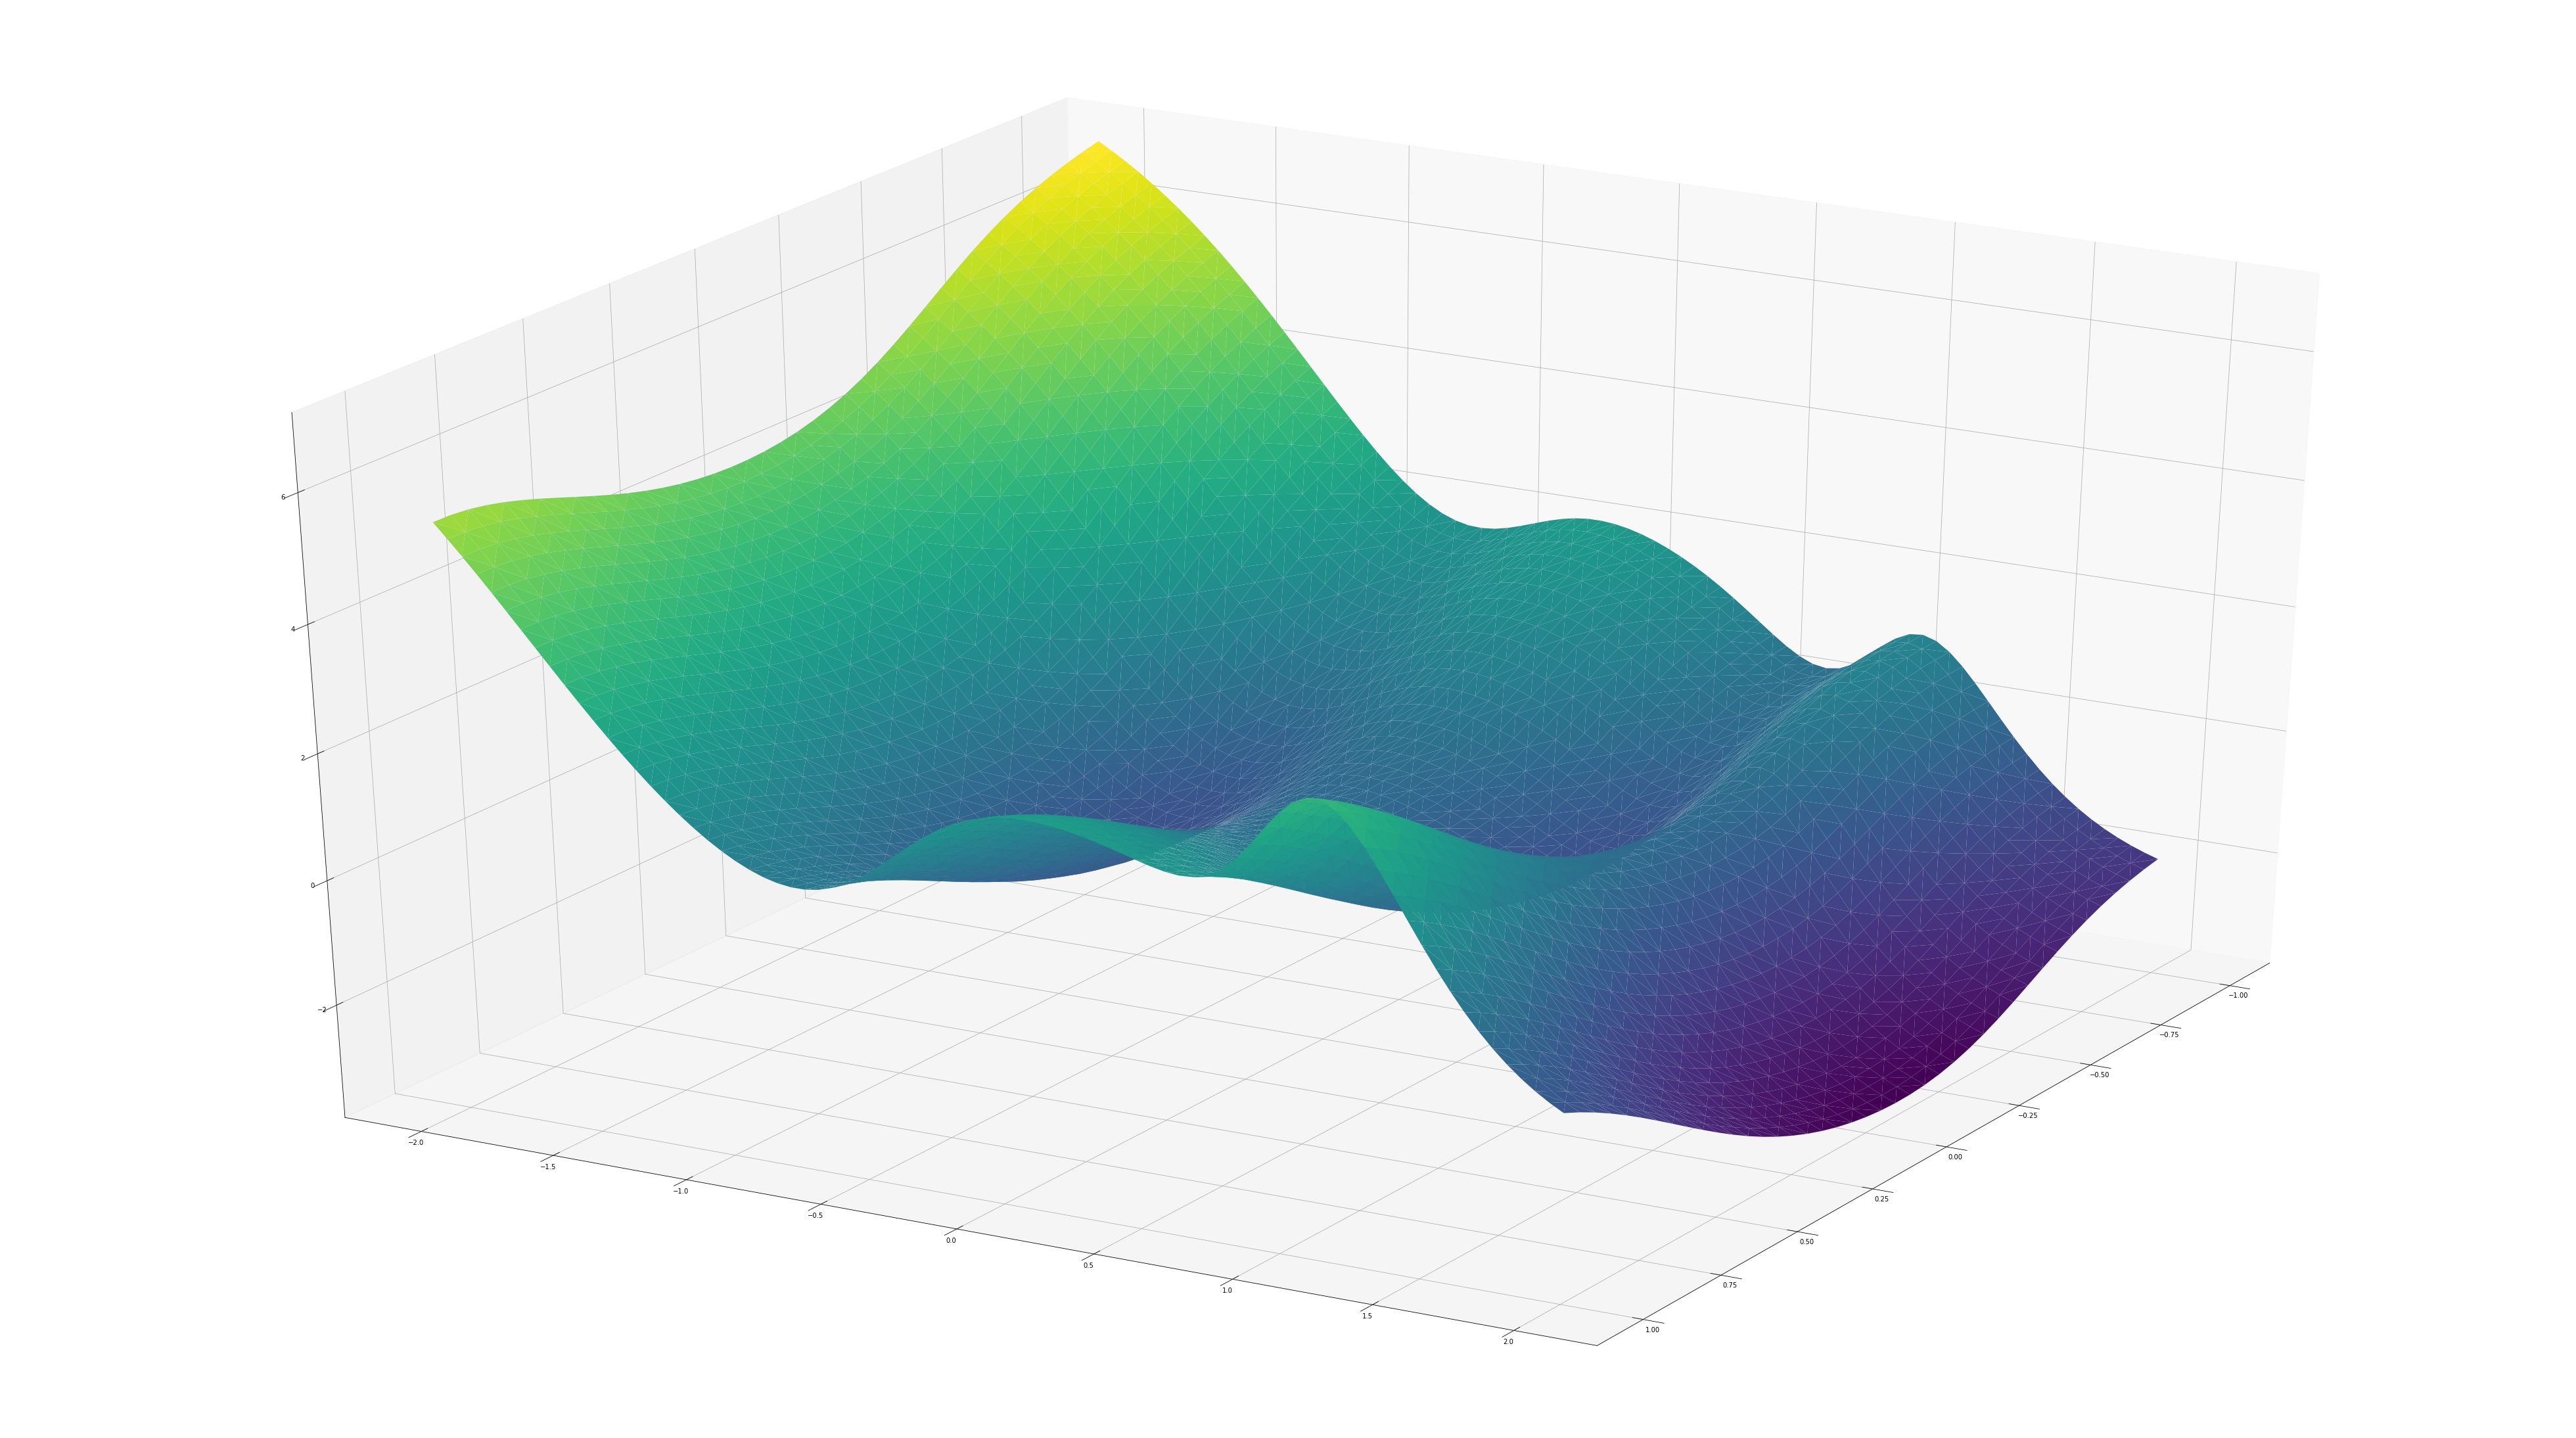

In [38]:
plotting()

# Q2 Extreme Learning 2.1

In [20]:
class MLP_Q2(object):
    
    def __init__(self, ro, sigma, N):
        self.ro = ro
        self.sigma = sigma 
        self.N = N

    def set_N(self, x): 
        self.N = x 
    def get_N(self): 
        return self.N     
    
    
    def second_norm(self,omega):
        return np.linalg.norm(omega)**2 

    def activation_f(self,t,sigma=1):
        return (np.exp(2*sigma*t)-1)/(np.exp(2*sigma*t)+1)

    def predict(self,X, W, bias, V):  
  
        N=self.N
        t=W.dot(X)-bias
        #print(t.shape)
        predicted_values=V.dot(self.activation_f(t,sigma))
        return predicted_values#, W,bias




    def reg_tr_error(self,V,functionArgs):
        X=functionArgs[0]
        true=functionArgs[1]
        W = functionArgs[2]
        bias = functionArgs[3]
        
        predicted=self.predict(X,W,bias,V)


        err=np.array(predicted)-true #err_all=np.sum(np.array(predicted)-true)**2
        err_all=err.dot(err.T)


        P=X.shape[1]
        #omega_upd=np.append(np.append(V,W, axis=1), bias, axis=1)
        a=pd.DataFrame(V.T)
        a[2]=W[:,0]
        a[3]=W[:,1]
        a[4]=bias
        omega_upd=np.matrix(a)
        return ((err_all)/(2*P)+ro*self.second_norm(omega_upd)).item(0)
    

  #  def get_params(self):
  #      return self.ro, self.sigma, self.N
    
  

In [21]:
def initializeParams_q2(N):
    n=2
    n_y=1
    W = np.random.randn(N,n)*np.random.randn(N,n)*np.random.randn(N,n)
    bias = np.random.randn(N,1)*np.random.randn(N,1)*np.random.randn(N,1)
    V = np.random.randn(n_y,N) 
    a=pd.DataFrame(V.T)
    a[2]=W[:,0]
    a[3]=W[:,1]
    a[4]=bias
    omega=np.matrix(a)
    
 
   
    return W,bias,V,omega

In [78]:
rho=0.00001#all_poss_conf[-2][1]
sigma=1#all_poss_conf[-2][2]
N=33#all_poss_conf[-2][0]
W,bias,V,omega=initializeParams_q2(N)

mlp=MLP_Q2(rho,sigma,N)
cv_data=np.concatenate((data_train,data_validate))
X_train = np.transpose(np.matrix(cv_data)[:,0:2])
Y_train = np.transpose(np.matrix(cv_data)[:,2:])


In [62]:
res=minimize(mlp.reg_tr_error,V, args=[X_train,Y_train, W, bias],method='L-BFGS-B')


In [63]:
V_star=res['x']

In [64]:
res

      fun: 0.1455164351411918
 hess_inv: <23x23 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.62653224e-04,  4.28462821e-05,  5.68128877e-05, -5.64048808e-05,
       -1.39482870e-04,  2.07667217e-05, -7.94642130e-06,  3.14248627e-05,
        1.15107923e-04, -8.71414052e-05,  1.16517906e-05, -1.36865519e-04,
        1.18488552e-05,  2.16013318e-04,  6.62248034e-05,  4.02872180e-05,
        2.66536793e-05, -2.06970552e-04,  1.34672828e-04,  1.25055521e-04,
        1.57998614e-04, -1.12659881e-04,  1.17156285e-04])
  message: b'STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT'
     nfev: 15024
      nit: 567
   status: 1
  success: False
        x: array([ -4.19140094,  -0.91115366,   0.91712868, -13.46889423,
         1.37551886,  -2.8481906 ,  -4.98086071,   4.91779843,
        -1.10819095,   5.8186746 ,   6.18198156,  25.07173216,
        18.82567928,   0.31590299,  -0.16007896,  -0.35610263,
        -6.75802156, -11.13138048,  -7.32169541,   0.9037326 ,
        -0.5

In [65]:
print(mlp.reg_tr_error(V_star,[X_test,Y_test,W,bias]))

0.1577511278324023


In [66]:
def q_2_mlp(rho,sigma,N,rep, X,Y,X_test,Y_test):
    test_err=[]
    train_err=[]
    from tqdm import tqdm
    for r in tqdm(range(rep)):
        W,bias,V,omega=initializeParams_q2(N)
        mlp=MLP_Q2(rho,sigma,N)
        res=minimize(mlp.reg_tr_error,V, args=[X,Y, W, bias],method='L-BFGS-B')
        V_star=res['x']
        curr_err=mlp.reg_tr_error(V_star,[X_test,Y_test,W,bias])
        test_err.append(curr_err)
        train_err.append(mlp.reg_tr_error(V_star,[X,Y,W,bias]))
        if np.min(test_err)==curr_err:
            best = (W,bias,V_star)
    return best,test_err,train_err

In [79]:
best_V_W_b,test_errs,train_errs=q_2_mlp(rho,sigma,N,10, X_train,Y_train,X_test,Y_test)

100%|██████████| 10/10 [04:04<00:00, 24.40s/it]


In [80]:
test_errs

[0.06045122990217858,
 0.12826062097906824,
 0.1002861525753524,
 0.10391934112994401,
 0.05990997470909221,
 0.09341352096869891,
 0.08286686739680556,
 0.08531249526607207,
 0.08346668165619038,
 0.06851235743647711]

In [81]:
train_errs

[0.059072162678287105,
 0.09933466788603673,
 0.09525459313420959,
 0.08811366300856359,
 0.06277546988783793,
 0.09391371088632536,
 0.08403756327601752,
 0.08388510526988732,
 0.08776593091183964,
 0.07491403249336524]

In [82]:
WW=best_V_W_b[0]
res_q2=pd.DataFrame(WW[:,0])
res_q2[2]=WW[:,1]
res_q2[3]=best_V_W_b[1]
res_q2[4]=best_V_W_b[2]
res_q2.to_csv('res_q2_W_b_V.csv')


In [83]:
res_q2=pd.read_csv('res_q2_W_b_V.csv',usecols=[1,2,3,4])
omega_upd=res_q2

In [84]:
omega_upd.values

array([[-2.65975428e-01,  5.99602345e-02, -3.87161589e-01,
        -7.05529041e+00],
       [-2.01723232e-02,  5.12122094e-01,  5.87687137e-02,
         4.27358027e+00],
       [-9.87514584e-01, -1.23216176e-01, -7.25898510e-01,
         2.81125783e+00],
       [ 1.42387886e-01,  1.31524916e+00,  1.48464083e-01,
         1.08719778e+00],
       [-3.70321060e-01,  5.01330719e-01, -9.56910632e-01,
         6.02107342e-01],
       [ 3.85959686e-02,  5.17889259e-01,  2.30030602e-02,
         5.44472977e+00],
       [-9.17188886e-02,  1.69022735e+00,  1.38560168e-01,
        -1.49557554e+01],
       [-4.21909572e-03,  2.56233804e-03, -1.10857665e-01,
         5.04986247e-01],
       [-9.55998745e-02, -8.23932972e-02,  1.94152480e-01,
         6.98889786e-02],
       [ 1.64472273e-01, -1.96950620e+00, -1.45046332e-02,
        -1.05282214e+01],
       [ 6.63522018e-03, -3.22870192e-01, -6.71794896e-01,
         2.48615177e+00],
       [-3.99012279e-01, -3.33608193e-04,  2.23561647e-03,
      

In [85]:
best_V_W_b

(array([[-2.65975428e-01,  5.99602345e-02],
        [-2.01723232e-02,  5.12122094e-01],
        [-9.87514584e-01, -1.23216176e-01],
        [ 1.42387886e-01,  1.31524916e+00],
        [-3.70321060e-01,  5.01330719e-01],
        [ 3.85959686e-02,  5.17889259e-01],
        [-9.17188886e-02,  1.69022735e+00],
        [-4.21909572e-03,  2.56233804e-03],
        [-9.55998745e-02, -8.23932972e-02],
        [ 1.64472273e-01, -1.96950620e+00],
        [ 6.63522018e-03, -3.22870192e-01],
        [-3.99012279e-01, -3.33608193e-04],
        [-2.12021362e-01, -5.98442340e-01],
        [ 8.62621219e-02, -9.27541309e-02],
        [ 1.38153539e-01, -8.44534819e-02],
        [-2.23003580e+00,  1.02747894e-01],
        [-4.09928367e-01,  9.67122607e-02],
        [-9.83366523e-03,  3.73591288e-01],
        [-6.13275190e-02,  5.19440349e-02],
        [-3.83030901e-02,  3.42136131e-02],
        [-1.03453353e+00, -5.27837100e-01],
        [-1.01361027e+00, -2.31362165e-02],
        [-3.02095235e-01,  4.897

In [86]:
mlp=MLP_Q2(rho,sigma,N)
print(mlp.reg_tr_error(best_V_W_b[2],[X_test,Y_test,best_V_W_b[0],best_V_W_b[1]]))

0.05990997470909221


In [87]:
def plotting_q2(W_inp,bias_inp,V_inp): 
 ##   rho=all_poss_conf[-2][1]
 ##   sigma=all_poss_conf[-2][2]
 ##   mlp=MLP(rho,sigma)
    
    fig = plt.figure(figsize=(70,40))
    ax = plt.axes(projection='3d')
   
  #  cv_data=np.concatenate((data_train,data_validate))
  #  X_train = np.transpose(np.matrix(cv_data)[:,0:2])
  #  Y_train = np.transpose(np.matrix(cv_data)[:,2:])
    
##    X_train = np.transpose(np.matrix(data)[:,0:2])
##    Y_train = np.transpose(np.matrix(data)[:,2:])
##
##    res=minimize(mlp.reg_tr_error,omega.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
  #  for i in range(5):
  #      omega2=res['x']
  #      res=minimize(mlp.reg_tr_error,omega2.flatten(), args=[X_train,Y_train],method='L-BFGS-B')
            
    #omega2=omega_star
    a=pd.DataFrame(V_inp.T)
    a[2]=W_inp[:,0]
    a[3]=W_inp[:,1]
    a[4]=bias_inp
    omega2=np.matrix(a)
    
 #   xy = np.mgrid[-2:2.002:0.05, -1:1.002:0.05].reshape(2,-1).T
    xy = np.mgrid[-1:1.002:0.05, -2:2.002:0.05].reshape(2,-1).T

    X = xy[:, 0].squeeze()
    Y = xy[:, 1].squeeze()
    
    XY=np.concatenate((X,Y)).reshape(2,X.shape[0]).T
    #print(XY)

    
    Z = mlp.predict(XY.T,W_inp,bias_inp,V_inp)
    Z = Z.T.reshape(X.shape[0],)

    ax = fig.gca(projection='3d')
    ax.view_init(azim=30)
   # ax.set_zlim(-2,6)
    surf = ax.plot_trisurf(X, Y, Z, linewidth=0.010, antialiased=True,cmap='viridis')
    fig.savefig('11_MLP')
    plt.grid()
  #  return X.shape,Y.shape,Z.shape,X,Y,Z.T
 
    
   

    plt.show()

In [88]:
uu=omega_upd.values[:,0:2]
bb=omega_upd.values[:,2].reshape(N,1)
vv=omega_upd.values[:,3].reshape(N,1).T
mlp=MLP_Q2(rho,sigma,N)
print(mlp.reg_tr_error(vv,[X_test,Y_test,np.array(uu),bb]))

0.05990997470909216


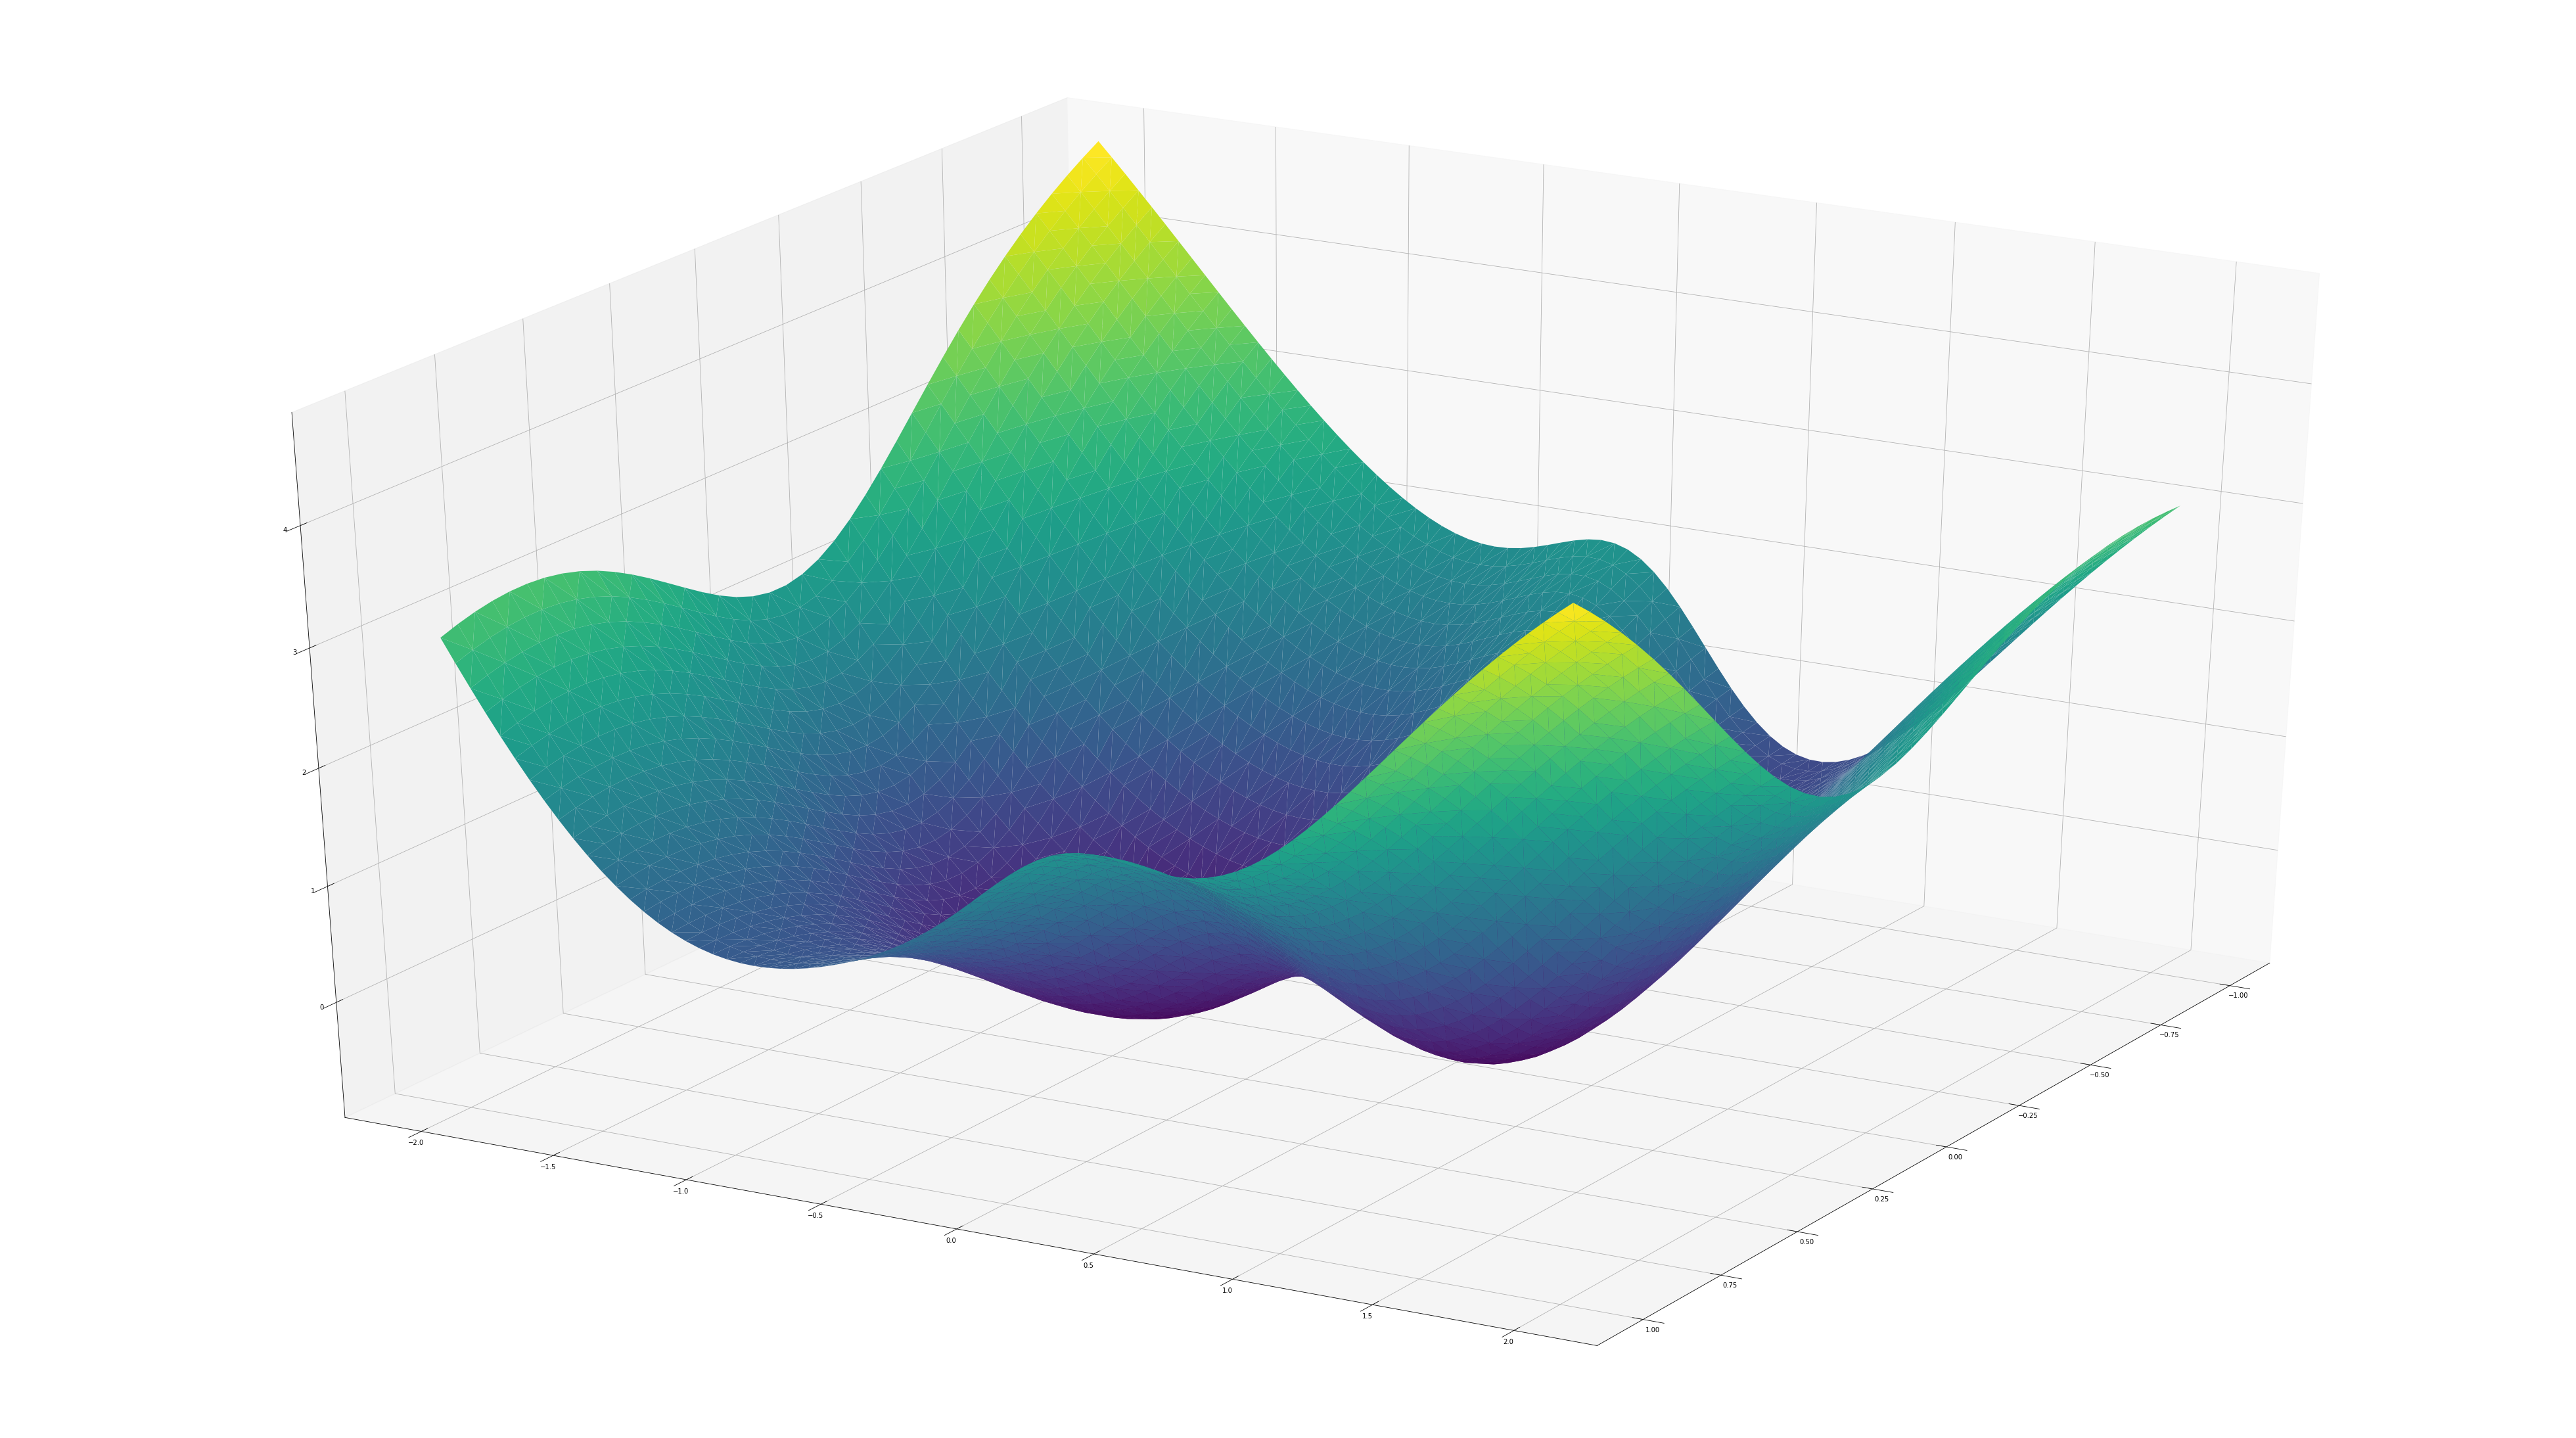

In [89]:
plotting_q2(np.array(uu),bb,vv)# with 33 neurons

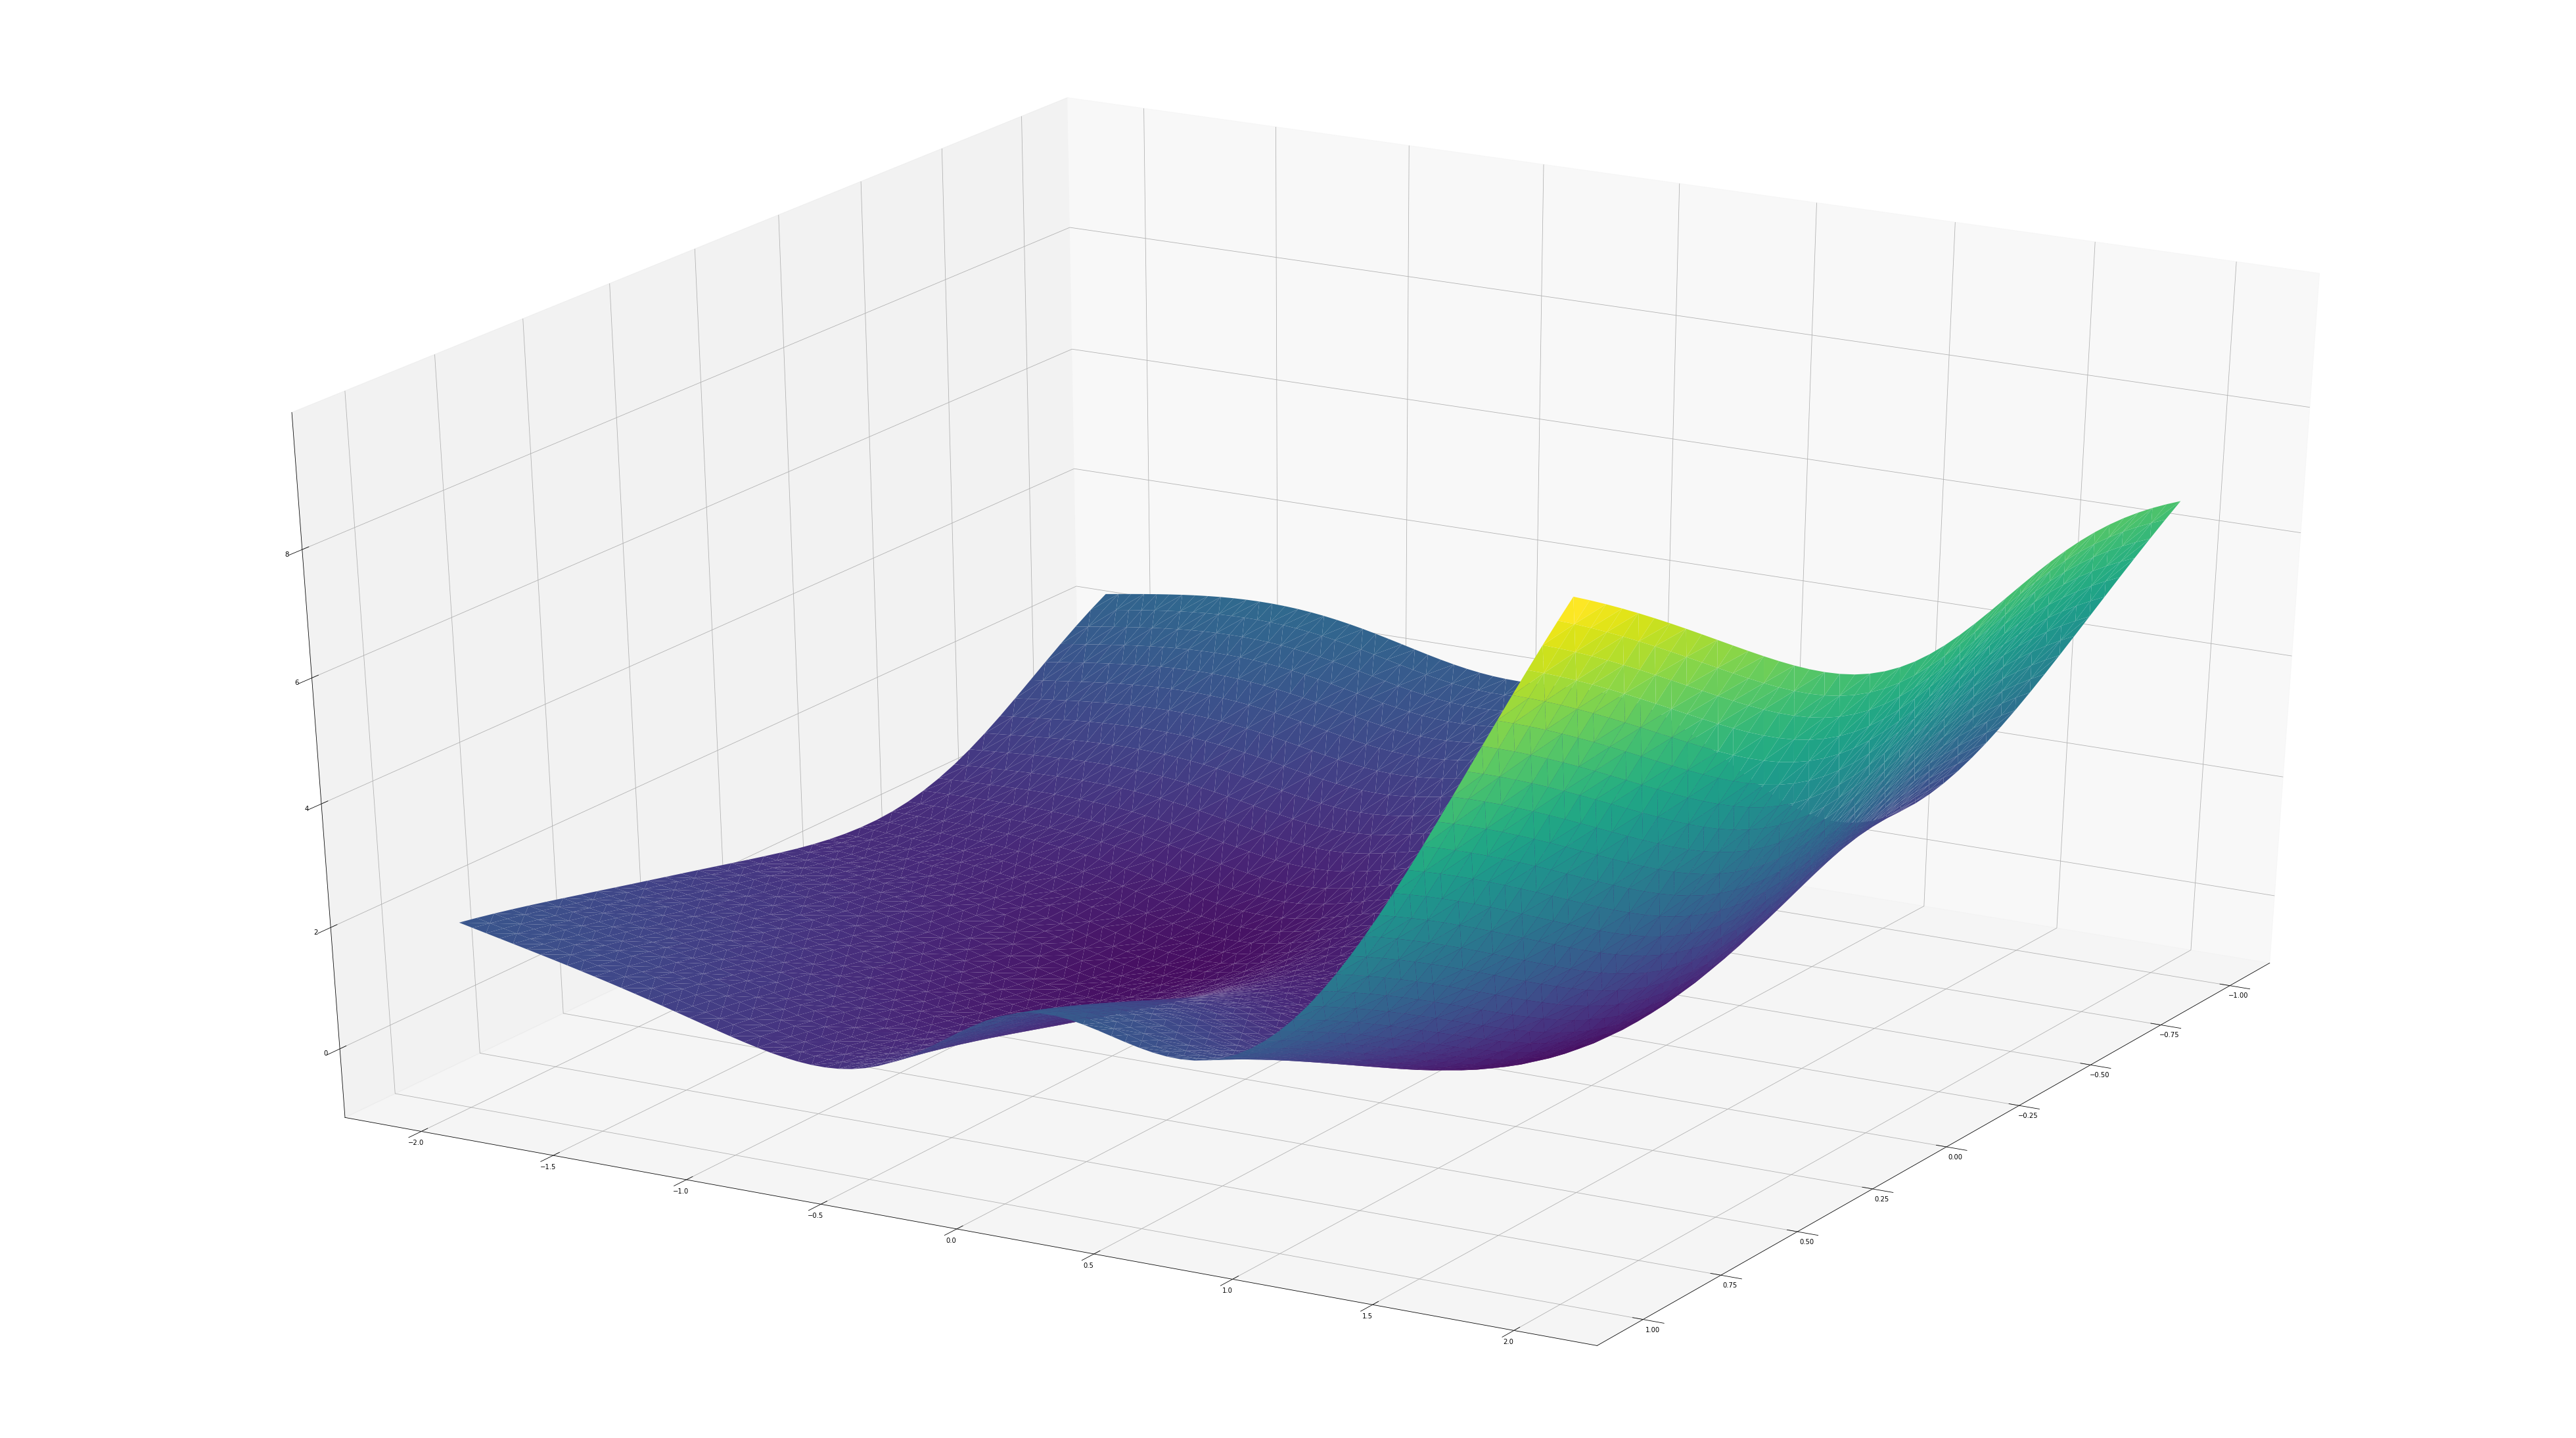

In [77]:
plotting_q2(np.array(uu),bb,vv)# with 23 neurons

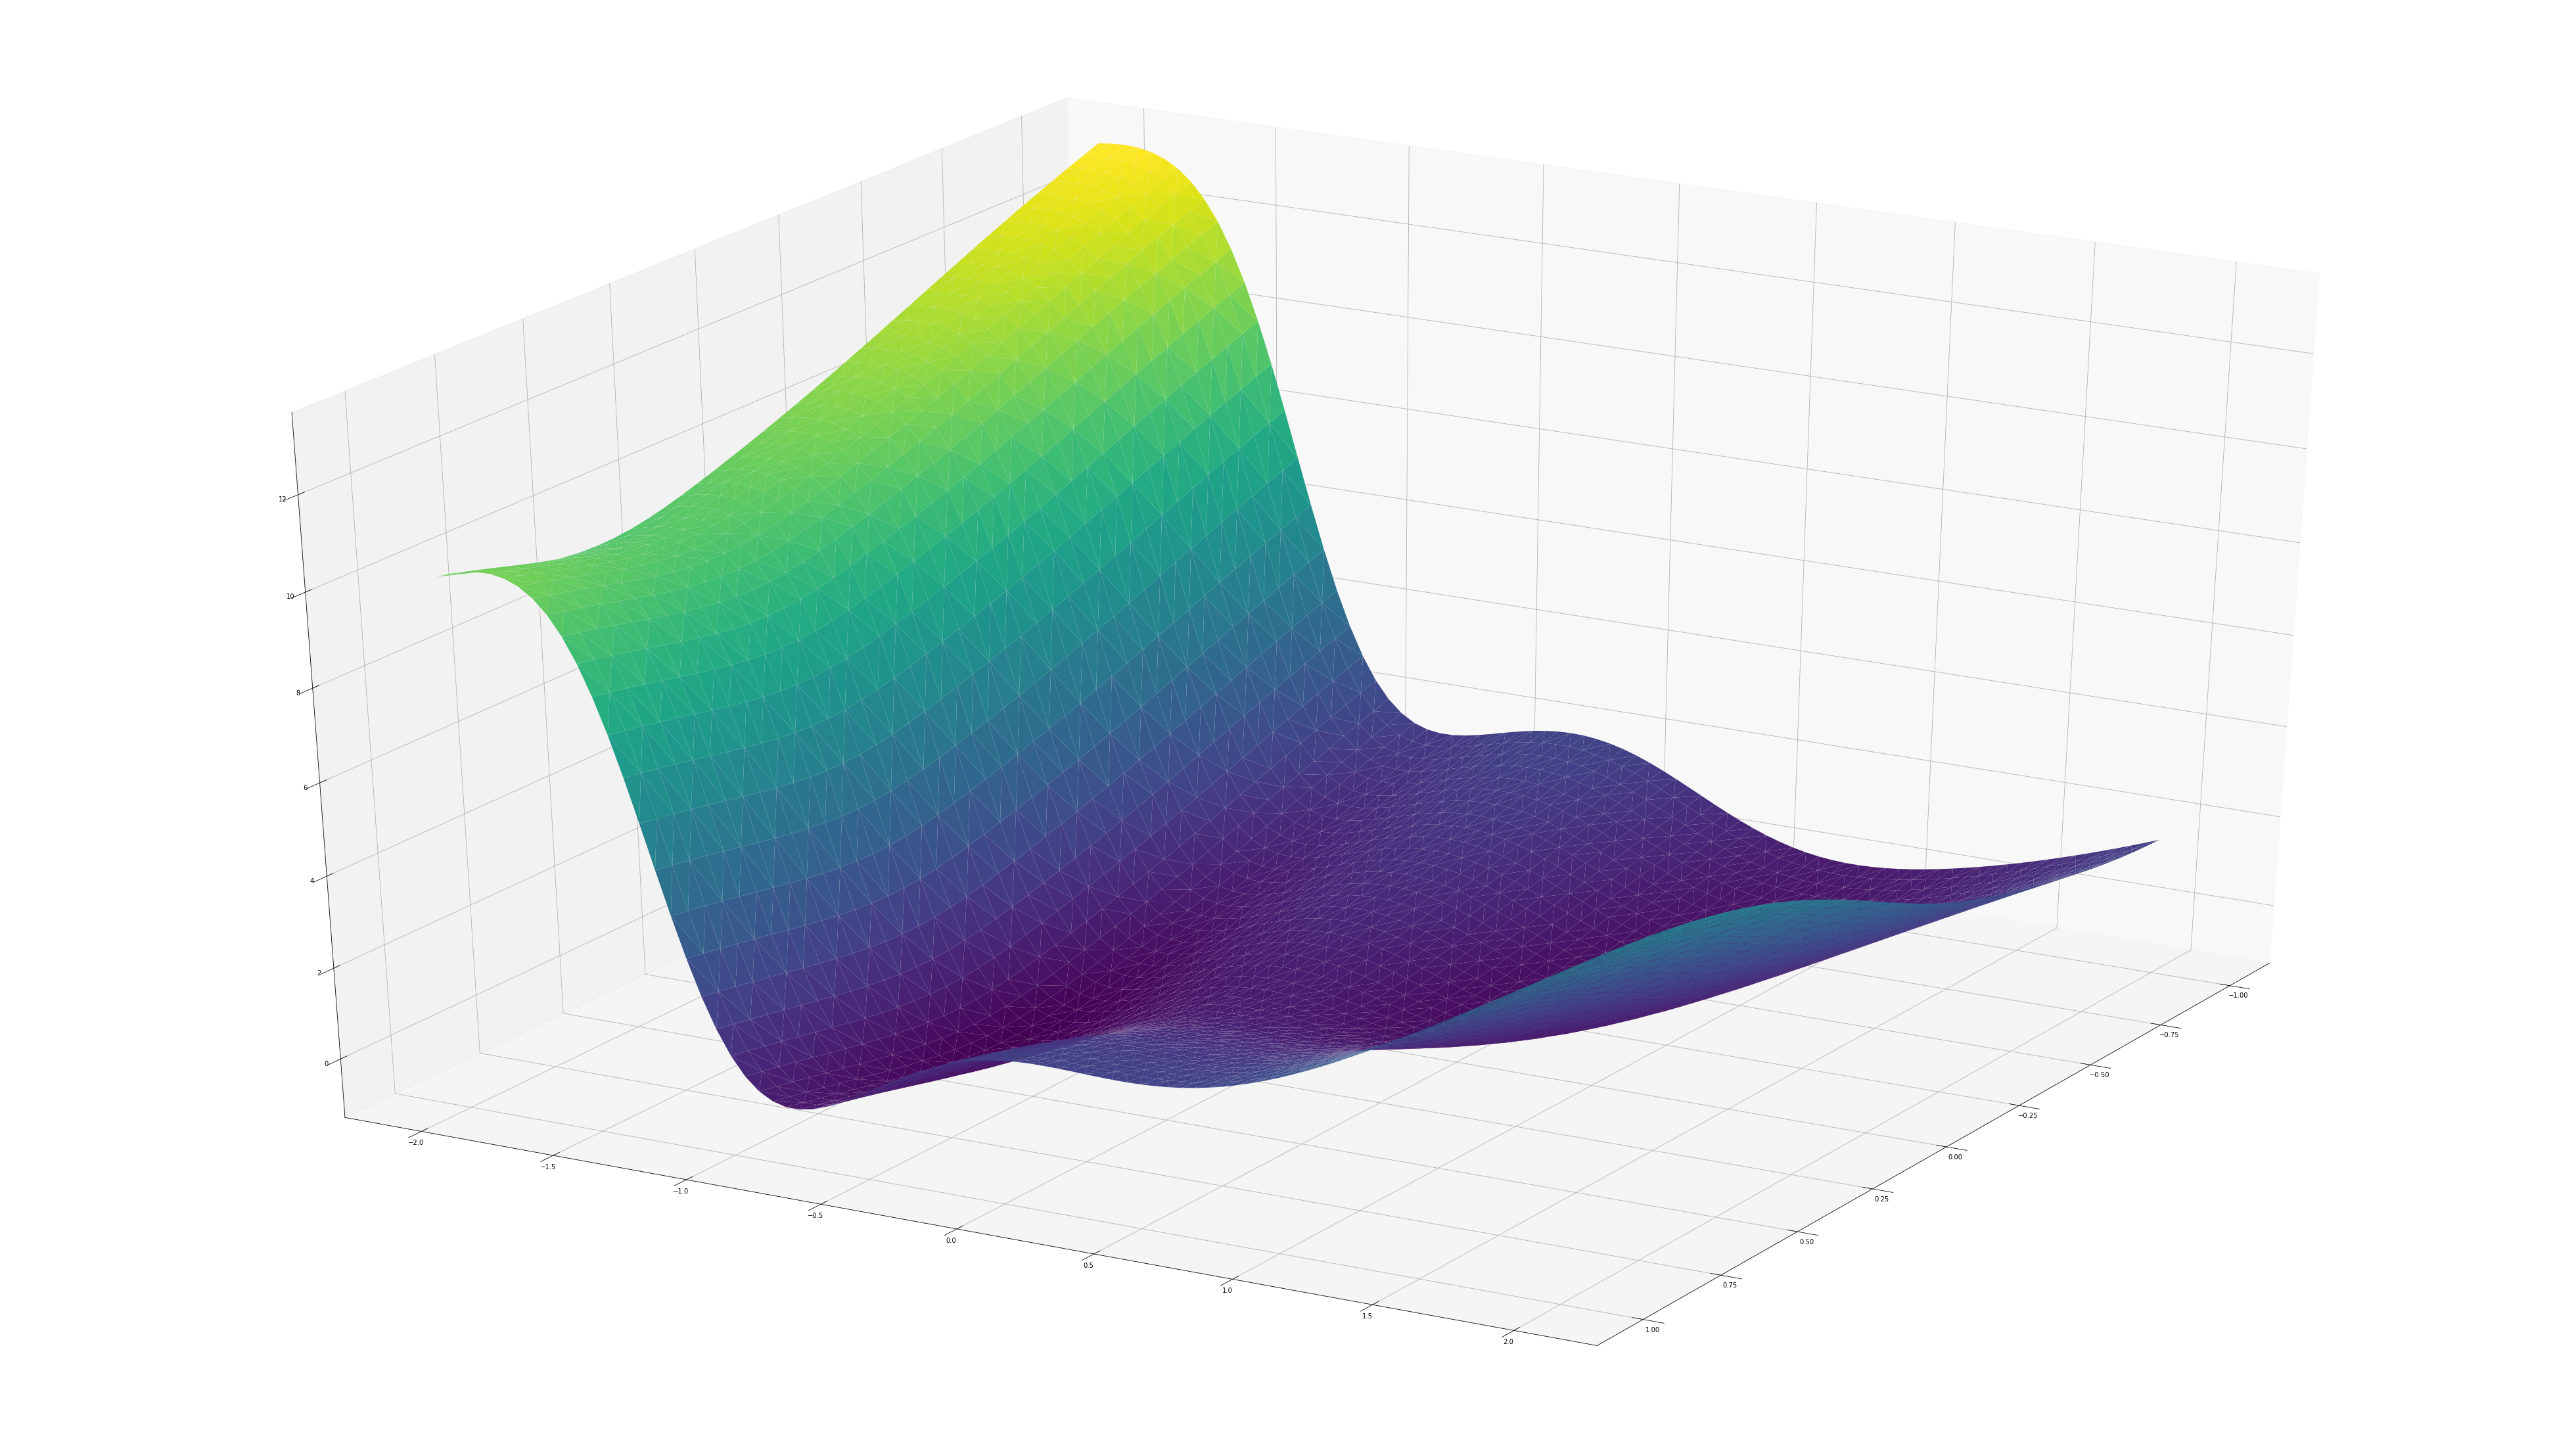

In [60]:
plotting_q2(best_V_W_b[0],best_V_W_b[1],best_V_W_b[2]) # with 17 neurons

In [265]:
N

33